In [1]:
%config InlineBackend.figure_formats = ['svg']
import requests
import pandas as pd
from sklearn.linear_model import LinearRegression
from datetime import datetime

In [2]:
url = r'https://www.meetup.com/mu_api/urlname/events/eventId/attendees?queries=%28endpoint%3Adata-mineurs%2Fevents%2F296717295%2Frsvps%2Cmeta%3A%28method%3Aget%29%2Cparams%3A%28desc%3A%21t%2Cfields%3A%27answers%2Cpay_status%2Cself%2Cweb_actions%2Cattendance_status%27%2Conly%3A%27answers%2Cresponse%2Cattendance_status%2Cguests%2Cmember%2Cpay_status%2Cupdated%27%2Corder%3Atime%29%2Cref%3AeventAttendees_data-mineurs_296717295%2Ctype%3Aattendees%29'


In [3]:
event_dt = datetime(2023, 11, 14, 19, 0)

In [4]:
r = requests.get(url)

In [5]:
data = r.json()
attendees = data['responses'][0]['value']

In [6]:
lst = [
    {
        'ts': item['updated'],
        'name': item['member']['name'],
    }
    for item in attendees
]

In [7]:
df = pd.DataFrame.from_dict(lst)
df = df\
    .sort_values(by='ts', ascending=True)\
    .reset_index()
df['nr'] = df.index + 1
df['dt'] = pd.to_datetime(df['ts'], unit='ms')
df.set_index('ts', inplace=True)
del df['index']
df

,name,nr,dt
ts,,,
1697469289000,Quentin B.,1,2023-10-16 15:14:49
1697469289000,Laetitia D.,2,2023-10-16 15:14:49
1697469289000,Thibaut G.,3,2023-10-16 15:14:49
1697469289000,Nicolas I.,4,2023-10-16 15:14:49
1697469289000,Virginie M.,5,2023-10-16 15:14:49
1697470928000,Dimitri M.,6,2023-10-16 15:42:08
1697472039000,Virginie M.,7,2023-10-16 16:00:39
1697472604000,Laurie B.,8,2023-10-16 16:10:04
1697473230000,Flavien,9,2023-10-16 16:20:30


<Axes: xlabel='ts'>

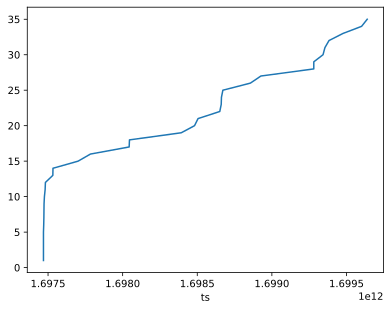

In [8]:
df['nr'].plot()

In [9]:
skip = 5

In [10]:
X = df[skip:].index.values.reshape(-1, 1)
y = df[skip:]['nr'].values

In [11]:
model = LinearRegression().fit(X, y)

In [12]:
df['regress'] = [None] * skip + list(model.predict(X))

In [13]:
df.set_index('dt', inplace=True)

<Axes: title={'center': 'Nombre de participants'}, xlabel='dt'>

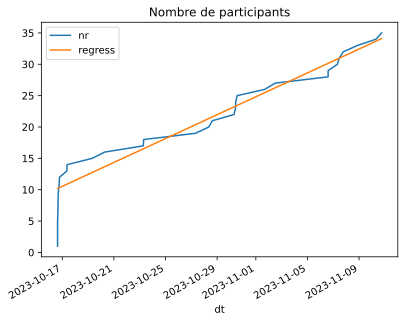

In [14]:
df[['nr', 'regress']].plot(title='Nombre de participants')

In [15]:
prediction_event = model.predict([[event_dt.timestamp() * 1000]])[0]
df.loc[event_dt] = ['Prédiction', None, prediction_event]

In [16]:
df

,name,nr,regress
dt,,,
2023-10-16 15:14:49,Quentin B.,1,NaN
2023-10-16 15:14:49,Laetitia D.,2,NaN
2023-10-16 15:14:49,Thibaut G.,3,NaN
2023-10-16 15:14:49,Nicolas I.,4,NaN
2023-10-16 15:14:49,Virginie M.,5,NaN
2023-10-16 15:42:08,Dimitri M.,6,10.217319
2023-10-16 16:00:39,Virginie M.,7,10.229556
2023-10-16 16:10:04,Laurie B.,8,10.235779
2023-10-16 16:20:30,Flavien,9,10.242674


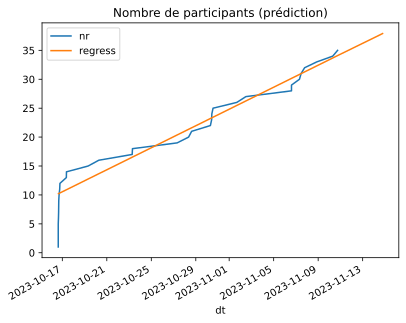

In [17]:
ax = df[['nr', 'regress']].plot(title='Nombre de participants (prédiction)', style=[])

In [18]:
round(prediction_event)

38